In [3]:
%matplotlib nbagg
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
from glob import glob

fnames = glob('../data/bicicletas-publicas/recorridos-realizados-*csv')

In [1]:
from bicis import parse

In [ ]:
df = parse.load_data_frame()

2240it [00:00, 22389.29it/s]

/Users/pablo/prog/bicis/bicis/../data/bicicletas-publicas/recorridos-realizados-*csv
Finished iterating recorridos-realizados-2010.csv

409286it [00:17, 23727.34it/s]


Finished iterating recorridos-realizados-2011.csv

1073994it [00:57, 17086.45it/s]


Finished iterating recorridos-realizados-2012.csv

2141554it [01:57, 17008.62it/s]


Finished iterating recorridos-realizados-2013.csv

3209871it [02:53, 19741.71it/s]


Finished iterating recorridos-realizados-2014.csv

3702868it [03:09, 29701.62it/s]


Finished iterating recorridos-realizados-2015.csv

3926255it [03:17, 28009.78it/s]

In [259]:
for e in tqdm._instances.copy(): e.close()

In [257]:
debug

3740468it [03:30, 17792.37it/s]

> <ipython-input-226-96cf733640c1>(12)parse_duration()
     10         return timedelta(seconds=60*int(d))
     11     elif d:
---> 12         h, m, s = [int(dp.search(e).group(0)) for e in d.split()]
     13         s = m*60 + s
     14         return timedelta(hours=h, seconds=s)

ipdb> p d
'0H 1 9MIN 51SEG'
ipdb> c


In [235]:
len(df)

73158

In [219]:
debug

> <ipython-input-216-cfbedaa543d9>(35)format_reader()
     33             except ValueError, e:
     34                 print field, e, os.path.basename(fname), li_no
---> 35                 1/0
     36 
     37         if 'duration' in new_doc:

ipdb> p i
7
ipdb> li_no
44
ipdb> doc
{'destinoestacionid': '17', 'destinofecha': '2012-01-02 09:02:54.357', 'periodo': '2012', 'origennombre': 'PZA. ROMA', 'destinonombre': 'UCA PUERTO MADERO', 'origenestacionid': '7', 'tiempouso': '26', 'origenfecha': '02/01/2012 8:36'}
ipdb> c


In [236]:
df.duration = (df.return_date - df.rent_date).apply(lambda x:x.total_seconds())

<IPython.core.display.Javascript object>


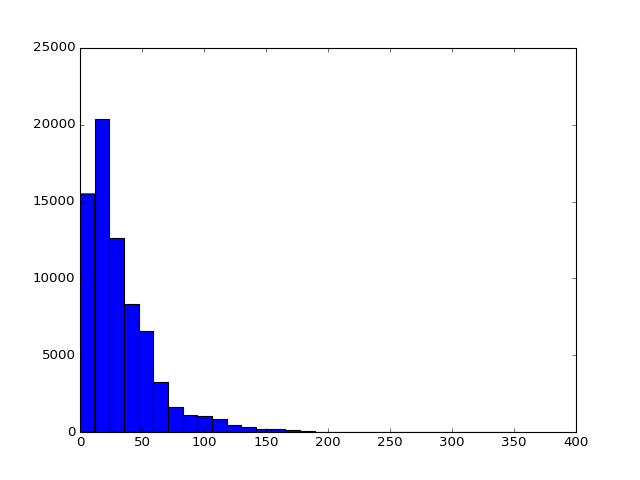

(array([  1.54980000e+04,   2.03640000e+04,   1.26080000e+04,
          8.34500000e+03,   6.58600000e+03,   3.28000000e+03,
          1.61000000e+03,   1.13800000e+03,   1.01400000e+03,
          8.73000000e+02,   4.85000000e+02,   3.25000000e+02,
          2.14000000e+02,   1.79000000e+02,   1.51000000e+02,
          4.60000000e+01,   3.20000000e+01,   1.60000000e+01,
          1.00000000e+01,   1.10000000e+01,   1.10000000e+01,
          1.40000000e+01,   1.20000000e+01,   1.10000000e+01,
          6.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          1.00000000e+01,   4.00000000e+00,   1.20000000e+01]),
 array([   0.        ,   11.83333333,   23.66666667,   35.5       ,
          47.33333333,   59.16666667,   71.        ,   82.83333333,
          94.66666667,  106.5       ,  118.33333333,  130.16666667,
         142.        ,  153.83333333,  165.66666667,  177.5       ,
         189.33333333,  201.16666667,  213.        ,  224.83333333,
         236.66666667,  248.5       , 

In [240]:
figure()
hist(df.duration[df.duration < 60*60*6] / 60.0, bins=30)

In [255]:
a = df.rent_date[0].to_datetime()
a.isoweekday?

<IPython.core.display.Javascript object>


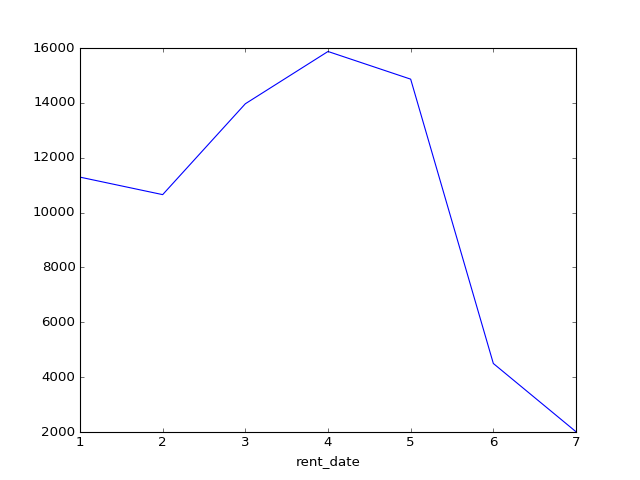

In [254]:
a = df.rent_date.apply(lambda x:x.to_datetime().isoweekday())
figure()
a.groupby(a).count().plot()